# Simple Content-Based Movie Recommendation System

This notebook implements a simple content-based movie recommendation system using TF-IDF and cosine similarity.

## 0. Install the necessary packages if you have not done so before

In [20]:
%pip install pandas scikit-learn numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


## 1. Import Required Libraries

In [22]:
# used for data interpretation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# used for data handling
import numpy as np
import pandas as pd

# used for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Preprocess Data

In [24]:
def preprocess_data(df):
    """Preprocess the data by filling null values and combining relevant text columns into one."""
    df['genres'] = df['genres'].apply(lambda x: ' '.join([i['name'] for i in eval(x)]))
    df['combined_features'] = df['title'].fillna("") + ' ' + df['genres'].fillna("") + ' ' + df['overview'].fillna("")
    return df

# load and preprocess data
df = pd.read_csv('tmdb_5000_movies.csv')
df = preprocess_data(df)
print(f"Full dataset shape: {df.shape}")

# use only a sample of 500 for training to keep the implementation simple
df_sample = df.sample(n=500, random_state=42)
print(f"Sampled dataset shape: {df_sample.shape}")

Full dataset shape: (4803, 21)
Sampled dataset shape: (500, 21)


## 3. Create TF-IDF Matrix

In [26]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_sample['combined_features'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (500, 6229)


## 4. Implement Recommendation Function

In [28]:
def get_recommendations(user_input, df,tfidf_vectorizer, tfidf_matrix, top_n=5):
    """Get top N movie recommendations based on user input."""
    # user_tfidf = TfidfVectorizer(stop_words='english').fit(df['combined_features'])
    user_vector = tfidf_vectorizer.transform([user_input])
    
    cosine_similarities = cosine_similarity(user_vector, tfidf_matrix).flatten()
    related_docs_indices = cosine_similarities.argsort()[:-top_n-1:-1]
    
    return [(df.iloc[idx]['title'], cosine_similarities[idx]) for idx in related_docs_indices]

## 5. Visualize Recommendations

In [30]:
def plot_recommendations(recommendations):
    """Plots the similarity scores as a barplot to provide an easy visualization"""
    titles, scores = zip(*recommendations)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(scores), y=list(titles))
    plt.title("Top 5 Movie Recommendations")
    plt.xlabel("Similarity Score")
    plt.ylabel("Movie Title")
    plt.show()

## 6. Test the Recommendation System

Top 5 movie recommendations:
1. Garfield (Similarity: 0.21)
2. Supporting Characters (Similarity: 0.18)
3. Don't Be Afraid of the Dark (Similarity: 0.18)
4. Away We Go (Similarity: 0.17)
5. What Just Happened (Similarity: 0.15)


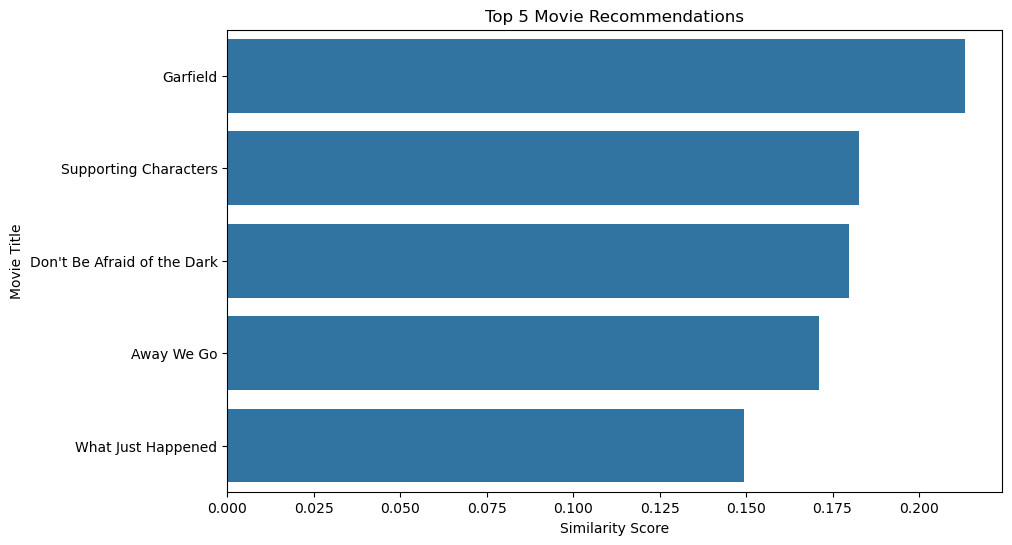

In [32]:
user_input = "I want to watch a comedy movie."
recommendations = get_recommendations(user_input, df_sample, tfidf, tfidf_matrix)

print("Top 5 movie recommendations:")
for i, (title, score) in enumerate(recommendations, 1):
    print(f"{i}. {title} (Similarity: {score:.2f})")

plot_recommendations(recommendations)